In [8]:
import numpy as np
import matplotlib.pyplot as plt

class SoftMarginSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param  # = 1/C
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1, +1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # No hinge loss
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Hinge loss
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)


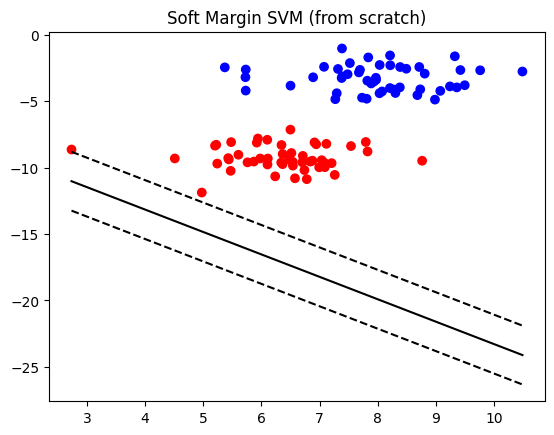

In [9]:
from sklearn.datasets import make_blobs

# Create simple 2D data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)

# Train Soft Margin SVM
svm = SoftMarginSVM(learning_rate=0.001, lambda_param=1/10, n_iters=1000)
svm.fit(X, y)

# Plot the decision boundary
def plot_svm(X, y, model):
    def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane(x0_2, model.w, model.b, 0)

    x1_1_m = get_hyperplane(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane(x0_2, model.w, model.b, -1)

    x1_1_p = get_hyperplane(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k--')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k--')

    plt.title("Soft Margin SVM (from scratch)")
    plt.show()

plot_svm(X, y, svm)
